In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
run = '5'
folder = 'filt'

file = f"../logs/real/{folder}/{run}.log"

df = pd.read_csv(file, names=('tag', 'ts', 'v1', 'v2', 'v3', 'v4'))

df_s = df[df.tag == 'pos']
df_s = df_s.rename(columns={'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'})


df_u = df[df.tag == 'input']
df_u = df_u.rename(columns={'v1' : 'roll', 'v2' : 'pitch', 'v3' : 'yaw', 'v4' : 'throttle'})

dt = 0.02


p_a = 0.02

In [107]:
x, y, z, a = [df_s[v].to_numpy() for v in ['x', 'y', 'z', 'a']]
roll, pitch, yaw, throttle = [df_u[v].to_numpy() for v in ['roll', 'pitch', 'yaw', 'throttle']]

shift = 30

x, y, z, a = [v[shift:] for v in [x, y, z, a]]
L = max([len(v) for v in [x, y, z, a]])


roll, pitch, yaw, throttle = [v[:L] for v in [roll, pitch, yaw, throttle]]



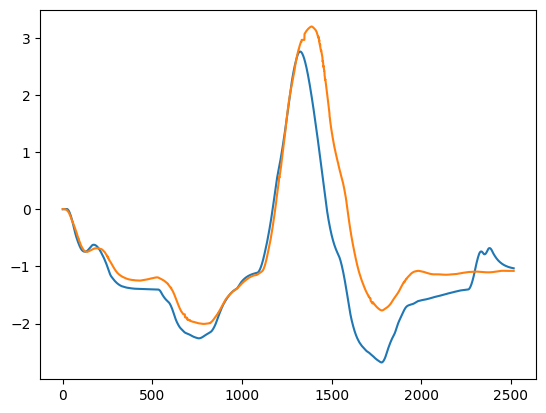

In [108]:
dx = dt*(np.cos(a+ p_a)*pitch - np.sin(a + p_a)*-roll)

plt.plot(1.4*np.cumsum(dx))
plt.plot(x- np.mean(x[:20]))
plt.show()


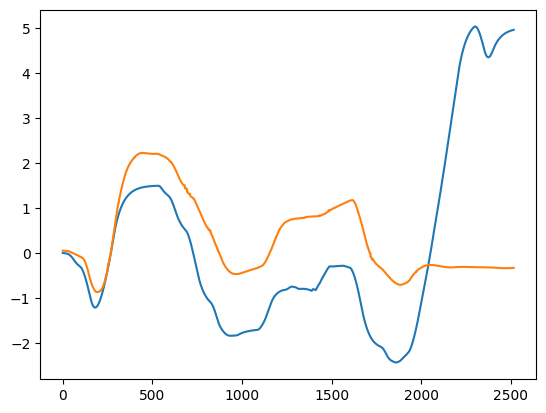

In [109]:
dy = dt*(np.sin(a+ p_a)*pitch + np.cos(a + p_a)*-roll)

plt.plot(1.4*np.cumsum(dy))
plt.plot(y - np.mean(y[:100]))
plt.show()


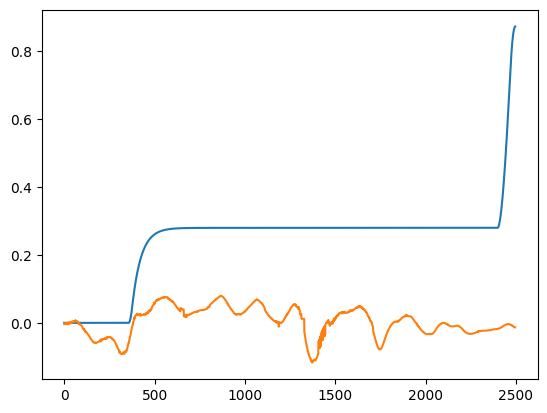

In [105]:
dz = dt*throttle

plt.plot(0.7*np.cumsum(dz))
plt.plot(z - np.mean(z[:100]))
plt.show()


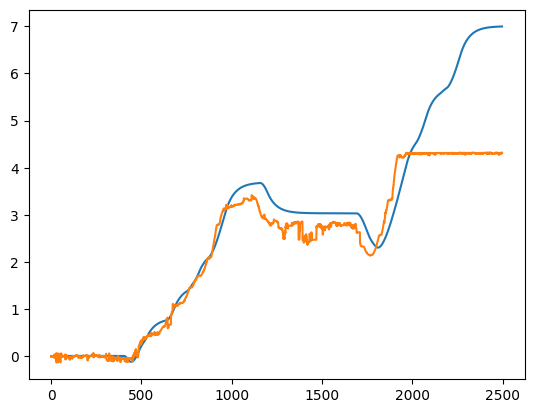

In [106]:
da = dt*yaw

plt.plot(0.8*np.cumsum(da))
plt.plot(a - np.mean(a[:100]))
plt.show()
